# Onderzoek Openstreetmap obesitas.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cbsodata
import time

# openstreetmap API package
# can be installed in conda cmd with:
# conda config --prepend channels conda-forge
# conda create -n ox --strict-channel-priority osmnx
import osmnx as ox



### pak alle gemeenten in nederland met obesitas data.

In [2]:
gemeenten_df = pd.read_csv('data/gemeenten_nl.csv')
gemeenten_df.pop('Unnamed: 0')
gemeenten_df.head()

,RegioS
0,Aa en Hunze
1,Aalsmeer
2,Aalten
3,Achtkarspelen
4,Alblasserdam


maak een lijst met alle gemeenten + ', Nederland' om de gemeentes op te zoeken in Openstreetmap.

In [3]:
places = []

for gemeente in gemeenten_df['RegioS']:
    places.append(str(gemeente) + ', Nederland')

### pak openstreetmaps bar data.

In [4]:
# kies tags om naar te zoeken. dit zijn alle klasses waar je junkfood kan kopen.
tags = {'amenity': ['fast_food']}

In [5]:
# lijst om het aantal restaurants in op te slaan.
n_fastfood = []

# loop door lijst met gemeente search query's en pak de bar data van de gemeenten.
i = 0
while i < len(places):
    print(places[i])
    # pakt bar data
    fastfood = ox.geometries.geometries_from_place(places[i], tags)
    # pak het aantal restaurants
    n_fastfood.append(len(fastfood))
    i += 1
    

Aa en Hunze, Nederland
Aalsmeer, Nederland
Aalten, Nederland
Achtkarspelen, Nederland
Alblasserdam, Nederland
Albrandswaard, Nederland
Alkmaar, Nederland
Almelo, Nederland
Almere, Nederland
Alphen aan den Rijn, Nederland
Alphen-Chaam, Nederland
Altena, Nederland
Ameland, Nederland
Amersfoort, Nederland
Amstelveen, Nederland
Amsterdam, Nederland
Apeldoorn, Nederland
Arnhem, Nederland
Assen, Nederland
Asten, Nederland
Baarle-Nassau, Nederland
Baarn, Nederland
Barendrecht, Nederland
Barneveld, Nederland
Beek (L.), Nederland
Beekdaelen, Nederland
Beemster, Nederland
Beesel, Nederland
Berg en Dal, Nederland
Bergeijk, Nederland
Bergen (L.), Nederland
Bergen (NH.), Nederland
Bergen op Zoom, Nederland
Berkelland, Nederland
Bernheze, Nederland
Best, Nederland
Beuningen, Nederland
Beverwijk, Nederland
De Bilt, Nederland
Bladel, Nederland
Blaricum, Nederland
Bloemendaal, Nederland
Bodegraven-Reeuwijk, Nederland
Boekel, Nederland
Borger-Odoorn, Nederland
Borne, Nederland
Borsele, Nederland
Boxmeer

In [7]:
# voegt de restaurant data toe aan de gemeente dataframe.
gemeenten_df['n_fastfood'] = n_fastfood

display(gemeenten_df)

,RegioS,n_fastfood
0,Aa en Hunze,8
1,Aalsmeer,10
2,Aalten,5
3,Achtkarspelen,3
4,Alblasserdam,6
...,...,...
338,Zundert,0
339,Zutphen,17
340,Zwartewaterland,4
341,Zwijndrecht,11


### pak de populatie data om het aantal restaurants in een gemeente in verhouding te brengen.

In [8]:
populatie_df = pd.read_csv('data/populatie_gemeenten.csv')
gemeenten_df['populatie'] = populatie_df['aantal']
display(gemeenten_df)

,RegioS,n_fastfood,populatie
0,Aa en Hunze,8,25399
1,Aalsmeer,10,31991
2,Aalten,5,27120
3,Achtkarspelen,3,27900
4,Alblasserdam,6,20136
...,...,...,...
338,Zundert,0,21988
339,Zutphen,17,48111
340,Zwartewaterland,4,22823
341,Zwijndrecht,11,44775


het aantal restaurants delen door de popualtie per gemeenten

In [14]:
fastfood_score = []

for ind_r, row_b in gemeenten_df.iterrows(): 
    if row_b['n_fastfood'] != 0:
        fastfood_score.append(row_b['n_fastfood'] / int(row_b['populatie']))
    else:
        print(row_b['RegioS'])
        fastfood_score.append(row_b['populatie'])

gemeenten_df['fastfood_score'] = fastfood_score

Asten
Cranendonck
Dantumadiel
Druten
Eemnes
Kapelle
Montfoort
Nieuwkoop
Oirschot
Opmeer
Renswoude
Rozendaal
Sint Anthonis
Zundert


### normaliseer de berekende data

In [15]:
# normaliseer populatie gedeeld door restaurants.
mx = max(gemeenten_df['fastfood_score'])
fastfood_score = [float(i)/mx for i in gemeenten_df['fastfood_score']]

In [16]:
# data opslaan in dataframe.
gemeenten_df['fastfood_score'] = fastfood_score

display(gemeenten_df)

,RegioS,n_fastfood,populatie,fastfood_score
0,Aa en Hunze,8,25399,1.080488e-08
1,Aalsmeer,10,31991,1.072306e-08
2,Aalten,5,27120,6.324510e-09
3,Achtkarspelen,3,27900,3.688617e-09
4,Alblasserdam,6,20136,1.022173e-08
...,...,...,...,...
338,Zundert,0,21988,7.542794e-01
339,Zutphen,17,48111,1.212135e-08
340,Zwartewaterland,4,22823,6.012205e-09
341,Zwijndrecht,11,44775,8.427595e-09


### pak de gezondheids data van gemeenten om de correlatie te berekenen.

In [17]:
# laad data in.
gezondheids_monitor_df = pd.read_csv('data/Gezondheidsmonitor.csv')
display(gezondheids_monitor_df)

,Regio’s,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%)
0,Aa en Hunze,0.7,50.1,49.2,34.3,14.9,40.6,7.1,5.4
1,Aalsmeer,1.2,50.3,48.5,36.4,12.1,40.4,6.9,5.0
2,Aalten,1.4,49.2,49.4,33.8,15.6,41.3,11.7,6.6
3,Achtkarspelen,0.8,42.6,56.6,40.0,16.6,40.4,11.1,7.9
4,Alblasserdam,2.0,41.7,56.3,38.8,17.5,55.8,5.9,5.2
...,...,...,...,...,...,...,...,...,...
338,Zundert,0.8,44.4,54.8,38.4,16.4,36.6,11.7,8.5
339,Zutphen,1.7,50.6,47.7,32.6,15.1,46.5,7.6,5.0
340,Zwartewaterland,1.9,42.5,55.6,35.2,20.5,42.8,9.2,7.6
341,Zwijndrecht,2.1,41.2,56.7,37.3,19.3,48.6,6.2,5.6


In [18]:
# voeg de data toe aan dataframe.
gezondheids_monitor_df[['n_fastfood', 'populatie', 'fastfood_score']] = gemeenten_df[['n_fastfood', 'populatie', 'fastfood_score']]
display(gezondheids_monitor_df)

,Regio’s,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_fastfood,populatie,fastfood_score
0,Aa en Hunze,0.7,50.1,49.2,34.3,14.9,40.6,7.1,5.4,8,25399,1.080488e-08
1,Aalsmeer,1.2,50.3,48.5,36.4,12.1,40.4,6.9,5.0,10,31991,1.072306e-08
2,Aalten,1.4,49.2,49.4,33.8,15.6,41.3,11.7,6.6,5,27120,6.324510e-09
3,Achtkarspelen,0.8,42.6,56.6,40.0,16.6,40.4,11.1,7.9,3,27900,3.688617e-09
4,Alblasserdam,2.0,41.7,56.3,38.8,17.5,55.8,5.9,5.2,6,20136,1.022173e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Zundert,0.8,44.4,54.8,38.4,16.4,36.6,11.7,8.5,0,21988,7.542794e-01
339,Zutphen,1.7,50.6,47.7,32.6,15.1,46.5,7.6,5.0,17,48111,1.212135e-08
340,Zwartewaterland,1.9,42.5,55.6,35.2,20.5,42.8,9.2,7.6,4,22823,6.012205e-09
341,Zwijndrecht,2.1,41.2,56.7,37.3,19.3,48.6,6.2,5.6,11,44775,8.427595e-09


In [19]:
gezondheids_monitor_df.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_fastfood,populatie,fastfood_score
Ondergewicht (%),1.000000,0.226497,-0.341771,-0.354774,-0.227313,-0.002847,-0.048274,0.006373,0.209592,0.189733,0.052483
Normaal gewicht (%),0.226497,1.000000,-0.992713,-0.813658,-0.857341,-0.348438,0.098440,0.226078,0.223781,0.186191,-0.001075
Overgewicht (%),-0.341771,-0.992713,1.000000,0.828530,0.855497,0.336792,-0.089068,-0.218656,-0.241002,-0.202427,-0.005568
Matig overgewicht (%),-0.354774,-0.813658,0.828530,1.000000,0.419011,0.122884,0.028692,-0.050048,-0.328607,-0.307211,0.060721
Ernstig overgewicht (obesitas) (%),-0.227313,-0.857341,0.855497,0.419011,1.000000,0.431288,-0.169288,-0.306887,-0.087062,-0.044416,-0.066179
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),-0.002847,-0.348438,0.336792,0.122884,0.431288,1.000000,-0.703225,-0.642777,0.087672,0.122182,-0.127439
Alcoholgebruik/Zware drinker (%),-0.048274,0.098440,-0.089068,0.028692,-0.169288,-0.703225,1.000000,0.768693,0.020770,-0.002946,0.105584
Alcoholgebruik/Overmatig drinker (%),0.006373,0.226078,-0.218656,-0.050048,-0.306887,-0.642777,0.768693,1.000000,-0.059596,-0.094883,0.126458
n_fastfood,0.209592,0.223781,-0.241002,-0.328607,-0.087062,0.087672,0.020770,-0.059596,1.000000,0.963884,-0.078645
populatie,0.189733,0.186191,-0.202427,-0.307211,-0.044416,0.122182,-0.002946,-0.094883,0.963884,1.000000,-0.080447


### bekijk bar_pop, populatie en %ernstige obesitas

In [20]:
import matplotlib.pyplot as plt

fastfood_score barplot.

<function matplotlib.pyplot.show(close=None, block=None)>

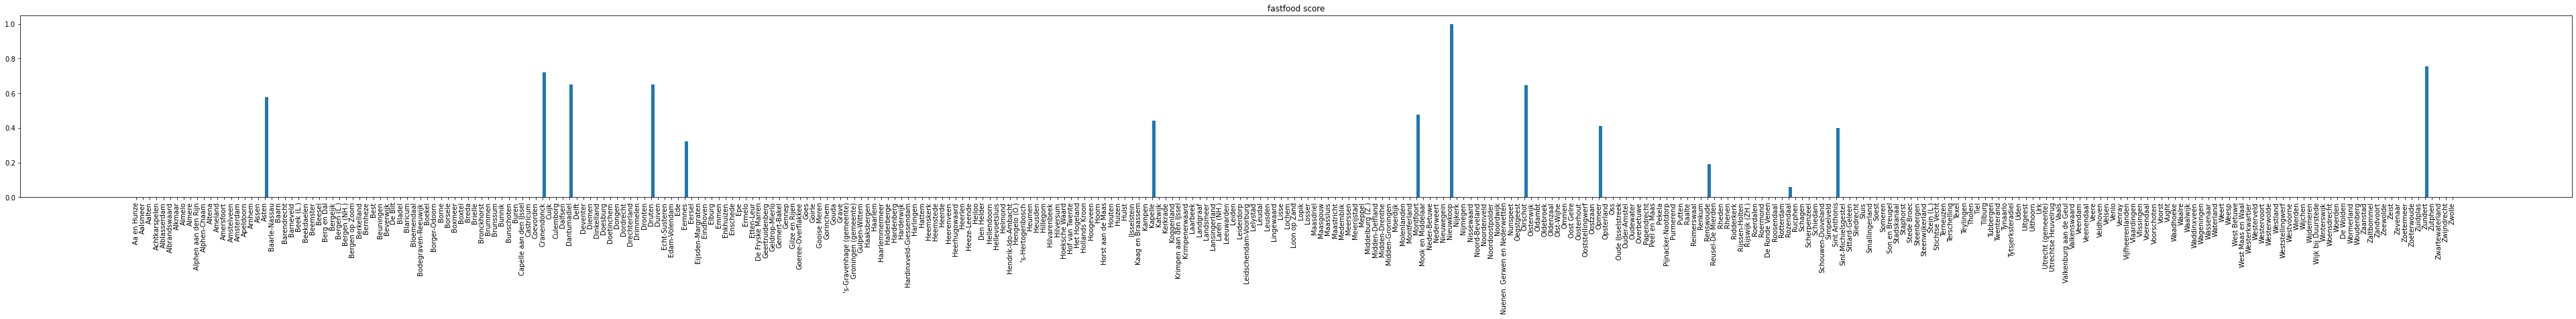

In [21]:
plt.figure(figsize=(150, 5))

plt.subplot(121)
plt.bar(gezondheids_monitor_df["Regio’s"], gezondheids_monitor_df["fastfood_score"], align='edge', width=0.5)
plt.xticks(gezondheids_monitor_df["Regio’s"], rotation='vertical')
plt.title("fastfood score")

plt.show

populatie barplot.

<function matplotlib.pyplot.show(close=None, block=None)>

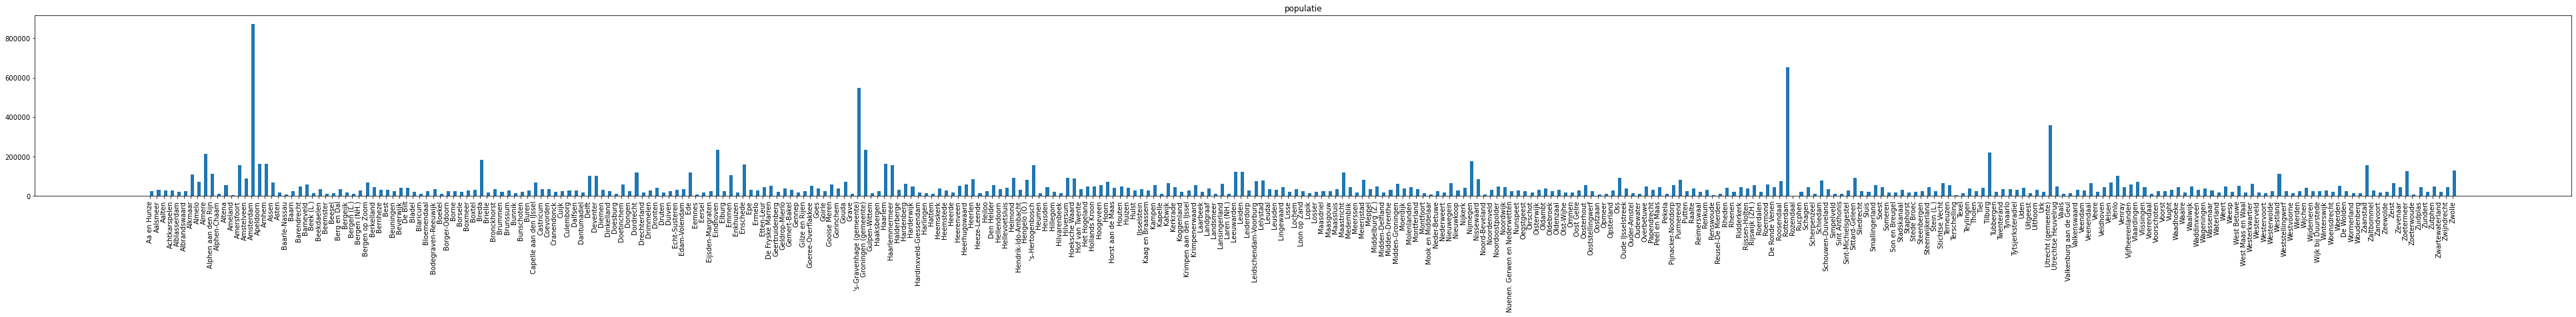

In [22]:
plt.figure(figsize=(150, 5))

plt.subplot(122)
plt.bar(gezondheids_monitor_df["Regio’s"], gezondheids_monitor_df["populatie"], align='edge', width=0.5)
plt.xticks(gezondheids_monitor_df["Regio’s"], rotation='vertical')
plt.title("populatie")

plt.show

ernstige obesitas barplot.

<function matplotlib.pyplot.show(close=None, block=None)>

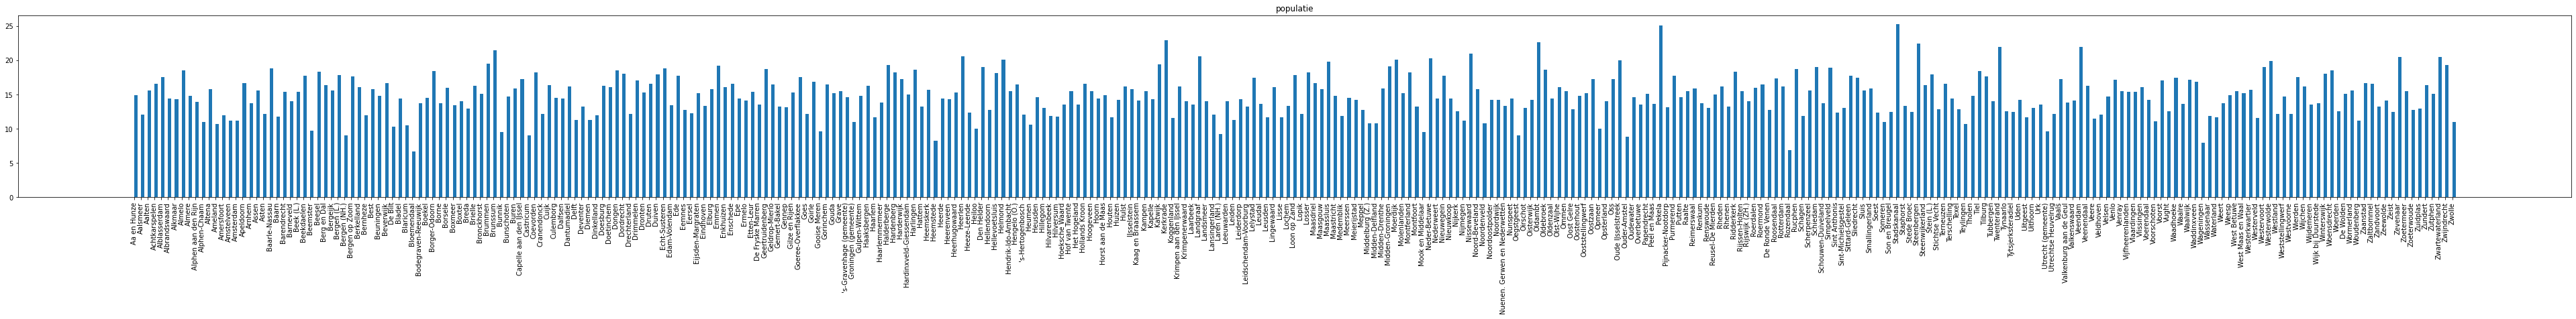

In [23]:
plt.figure(figsize=(150, 5))

plt.subplot(122)
plt.bar(gezondheids_monitor_df["Regio’s"], gezondheids_monitor_df["Ernstig overgewicht (obesitas) (%)"], align='edge', width=0.5)
plt.xticks(gezondheids_monitor_df["Regio’s"], rotation='vertical')
plt.title("populatie")

plt.show

### deel de dataset op in grote en kleine gemeenten

eerst kijken we naar wat het resultaat is als je ze opdeeld in gemeenten met meer dan 10 bars en minder dan 10

In [24]:
fastfoodScore_df = gezondheids_monitor_df.drop(gezondheids_monitor_df[gezondheids_monitor_df.n_fastfood < 11].index)

In [25]:
Nfastfood_df = gezondheids_monitor_df.drop(gezondheids_monitor_df[gezondheids_monitor_df.n_fastfood > 10].index)

In [26]:
fastfoodScore_df.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_fastfood,populatie,fastfood_score
Ondergewicht (%),1.000000,0.271582,-0.384222,-0.366282,-0.308263,-0.116627,0.082100,0.076809,0.268581,0.236002,0.207762
Normaal gewicht (%),0.271582,1.000000,-0.992835,-0.859722,-0.877385,-0.442245,0.246210,0.252478,0.358941,0.311775,0.209044
Overgewicht (%),-0.384222,-0.992835,1.000000,0.870512,0.879363,0.438595,-0.246239,-0.251910,-0.376705,-0.327531,-0.226014
Matig overgewicht (%),-0.366282,-0.859722,0.870512,1.000000,0.531307,0.286944,-0.209604,-0.167509,-0.460559,-0.425748,-0.192028
Ernstig overgewicht (obesitas) (%),-0.308263,-0.877385,0.879363,0.531307,1.000000,0.473344,-0.217304,-0.267961,-0.202786,-0.151908,-0.201837
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),-0.116627,-0.442245,0.438595,0.286944,0.473344,1.000000,-0.720315,-0.653297,-0.002930,0.035131,-0.185530
Alcoholgebruik/Zware drinker (%),0.082100,0.246210,-0.246239,-0.209604,-0.217304,-0.720315,1.000000,0.794499,0.118646,0.081179,0.321404
Alcoholgebruik/Overmatig drinker (%),0.076809,0.252478,-0.251910,-0.167509,-0.267961,-0.653297,0.794499,1.000000,-0.030234,-0.086385,0.478778
n_fastfood,0.268581,0.358941,-0.376705,-0.460559,-0.202786,-0.002930,0.118646,-0.030234,1.000000,0.964315,0.228120
populatie,0.236002,0.311775,-0.327531,-0.425748,-0.151908,0.035131,0.081179,-0.086385,0.964315,1.000000,0.073143


In [21]:
Nfastfood_df.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_fastfood,populatie,fastfood_score
Ondergewicht (%),1.000000,0.190316,-0.305904,-0.325213,-0.190658,0.021980,-0.111756,-0.020526,-0.050930,-0.032353,0.099523
Normaal gewicht (%),0.190316,1.000000,-0.992820,-0.788747,-0.851622,-0.313304,0.009945,0.213856,-0.064074,-0.090717,0.002655
Overgewicht (%),-0.305904,-0.992820,1.000000,0.803607,0.849754,0.301636,0.003690,-0.204305,0.068344,0.091302,-0.014775
Matig overgewicht (%),-0.325213,-0.788747,0.803607,1.000000,0.369266,0.081742,0.154618,0.004093,0.029632,0.008642,0.051839
Ernstig overgewicht (obesitas) (%),-0.190658,-0.851622,0.849754,0.369266,1.000000,0.399443,-0.130946,-0.322764,0.081651,0.135348,-0.070461
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),0.021980,-0.313304,0.301636,0.081742,0.399443,1.000000,-0.690721,-0.630985,0.092028,0.109600,-0.117029
Alcoholgebruik/Zware drinker (%),-0.111756,0.009945,0.003690,0.154618,-0.130946,-0.690721,1.000000,0.750467,-0.097236,-0.025014,0.110900
Alcoholgebruik/Overmatig drinker (%),-0.020526,0.213856,-0.204305,0.004093,-0.322764,-0.630985,0.750467,1.000000,-0.084315,-0.037700,0.142647
n_fastfood,-0.050930,-0.064074,0.068344,0.029632,0.081651,0.092028,-0.097236,-0.084315,1.000000,0.435256,-0.452070
populatie,-0.032353,-0.090717,0.091302,0.008642,0.135348,0.109600,-0.025014,-0.037700,0.435256,1.000000,-0.154692


je kan zien dat de correlaties beter worden wanneer je klein van groot schijt.
dit kan komen omdat van grote gemeenten meer data beschikbaar is of omdat kleine gemeenten onvoorspelbaar zijn door de kleine aanwezigheid van restaurants, wat er voor zorgd dat 0 restaurants en 3 restaurants een heel groot verschil veroorzaakt in de fastfood_score.

In [22]:
print(sum(fastfoodScore_df['populatie']))

12214191


nu als je ze opdeeld in gemeenten met meer dan 30000 mensen.

In [23]:
fastfoodScore_df2 = gezondheids_monitor_df.drop(gezondheids_monitor_df[gezondheids_monitor_df.populatie < 30000].index)

In [24]:
fastfoodScore_df2.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_fastfood,populatie,fastfood_score
Ondergewicht (%),1.000000,0.307740,-0.418264,-0.447874,-0.274101,-0.019721,0.015273,-0.043966,0.272010,0.248376,-0.184928
Normaal gewicht (%),0.307740,1.000000,-0.992901,-0.830017,-0.869121,-0.341361,0.161320,0.154323,0.326852,0.289442,-0.127566
Overgewicht (%),-0.418264,-0.992901,1.000000,0.847733,0.864250,0.328818,-0.156453,-0.142415,-0.345096,-0.306565,0.144247
Matig overgewicht (%),-0.447874,-0.830017,0.847733,1.000000,0.465945,0.138474,-0.070061,-0.041731,-0.425159,-0.396976,0.154502
Ernstig overgewicht (obesitas) (%),-0.274101,-0.869121,0.864250,0.465945,1.000000,0.414159,-0.191377,-0.196073,-0.172200,-0.134503,0.096490
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),-0.019721,-0.341361,0.328818,0.138474,0.414159,1.000000,-0.745391,-0.660418,0.036185,0.060543,-0.086343
Alcoholgebruik/Zware drinker (%),0.015273,0.161320,-0.156453,-0.070061,-0.191377,-0.745391,1.000000,0.788207,0.095374,0.079906,0.032509
Alcoholgebruik/Overmatig drinker (%),-0.043966,0.154323,-0.142415,-0.041731,-0.196073,-0.660418,0.788207,1.000000,-0.029780,-0.049728,0.045582
n_fastfood,0.272010,0.326852,-0.345096,-0.425159,-0.172200,0.036185,0.095374,-0.029780,1.000000,0.968873,-0.308570
populatie,0.248376,0.289442,-0.306565,-0.396976,-0.134503,0.060543,0.079906,-0.049728,0.968873,1.000000,-0.243199
